In [13]:
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt

In [14]:
def bar_plot(y, title='', label='', start_from_zero=False):
    if start_from_zero:
        x = list(range(len(y)))
    else:
        x = list(range(1, len(y)+1))

    plt.figure(figsize=(8, 5))
    plt.bar(x, y, color='skyblue', edgecolor='black', label=label)
    plt.title(title)
    plt.xlabel('Iteracja')
    plt.ylabel(label)
    plt.xticks(x, [str(i) for i in x])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

In [15]:
def plot_results(results_file, attack_name):
    with open(results_file, "r") as json_file:
        results = json.load(json_file)
        
    attack_test_acc = [results['pre_train_results']['attack_test_acc']] + [x['attack_test_acc'] for x in results['training_results']]
    test_acc = [results['pre_train_results']['test_acc']] + [x['test_acc'] for x in results['training_results']]
    combined_acc = [x['combined_acc'] for x in results['training_results']]
    oneshot_attack_test_acc = [x['oneshot_attack_test_acc'] for x in results['training_results']]
    epochs_acc = [x['epochs_acc'] for x in results['training_results']]

    bar_plot(attack_test_acc, f'{attack_name}: trafność klasyfikacji na adwersarzowym zbiorze testowym przed treningiem i po kolejnych iteracjach douczania', 'Trafność klasyfikacji', True)
    bar_plot(test_acc, f'{attack_name}: trafność klasyfikacji na zbiorze testowym przed treningiem i po kolejnych iteracjach douczania (domain drift)', 'Trafność klasyfikacji', True)
    bar_plot(combined_acc, f'{attack_name}: trafność klasyfikacji na złączonym zbiorze treningowym i adwersarzowym po kolejnych iteracjach douczania', 'Trafność klasyfikacji')
    bar_plot(oneshot_attack_test_acc, f'{attack_name}: trafność klasyfikacji na nowym adwersarzowym zbiorze testowym po kolejnych iteracjach douczania', 'Trafność klasyfikacji')

    min_max_acc = min([max(x) for x in epochs_acc])
    epochs_for_acc = [next((i+1 for i, val in enumerate(sublist) if val >= min_max_acc), None) for sublist in epochs_acc]
    bar_plot(epochs_for_acc, f'{attack_name}: liczba epok potrzebna do osiągnięcia trafności klasyfikacji na poziomie: {min_max_acc:.2f} w danej iteracji douczania', 'Liczba epok')

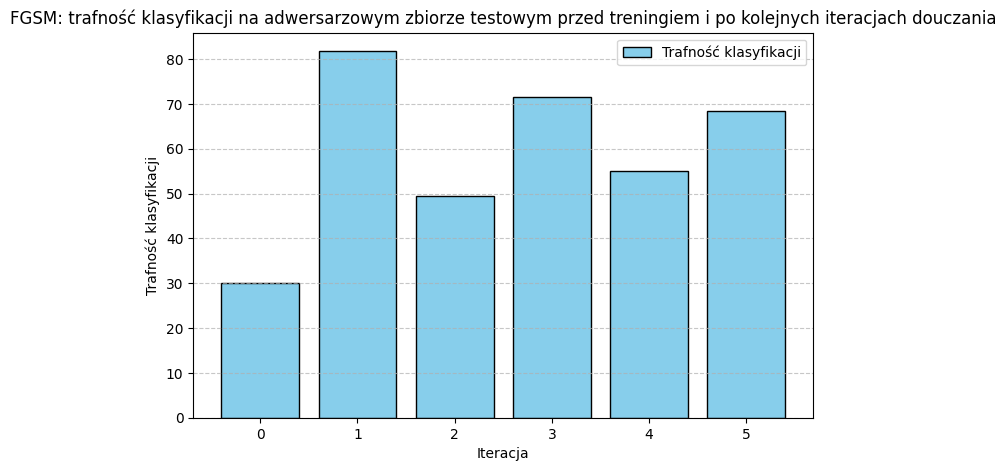

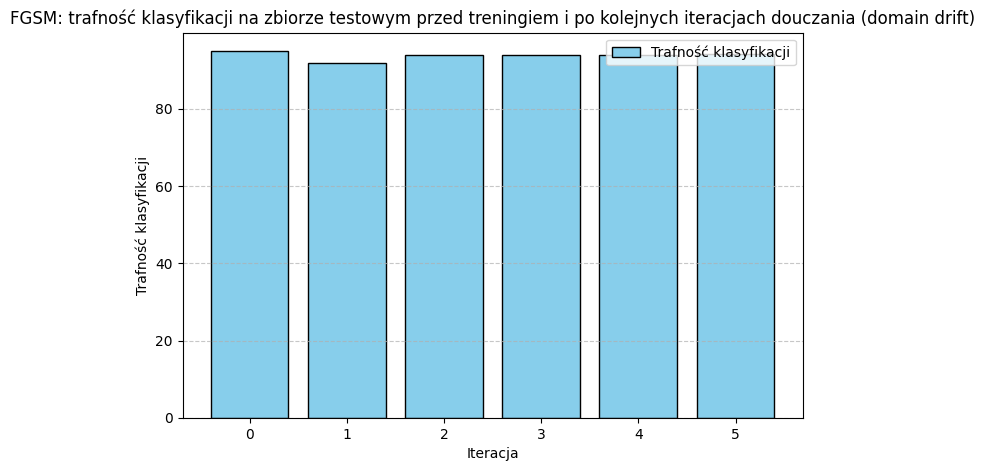

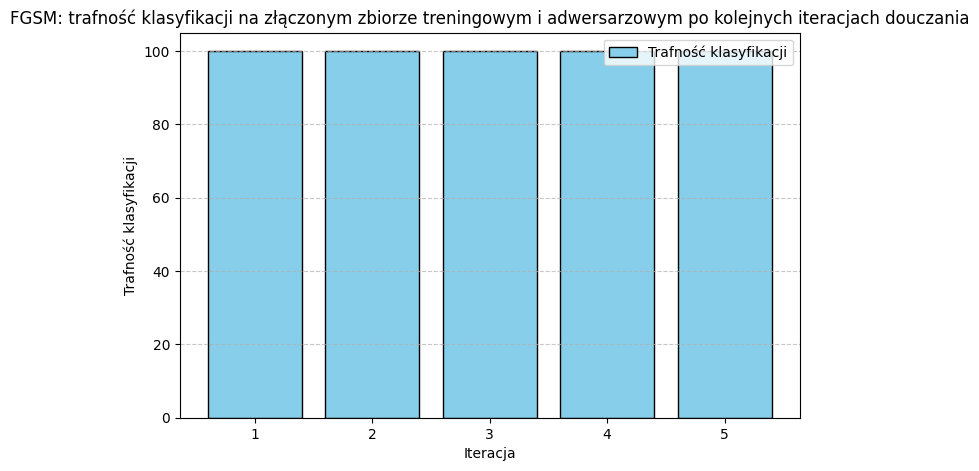

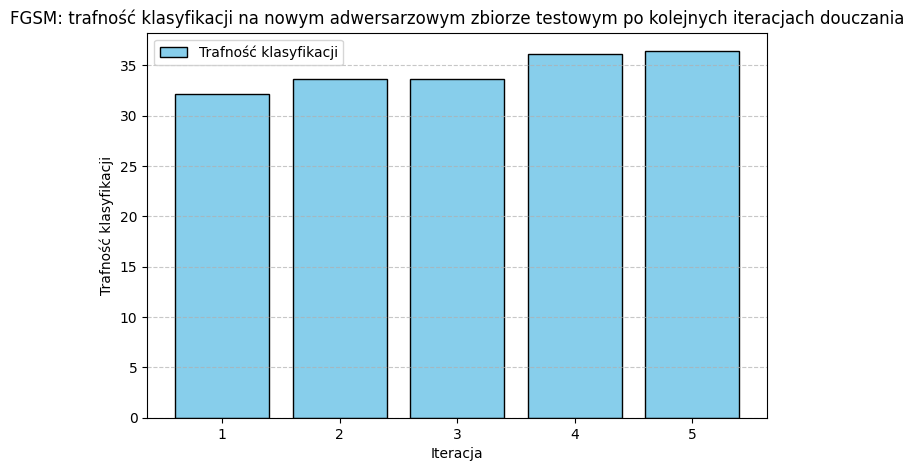

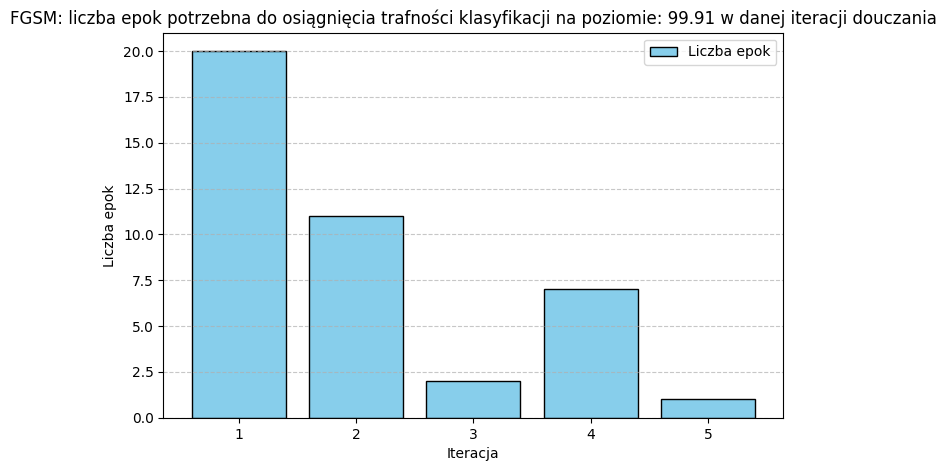

In [16]:
plot_results('fgsm_results.json', 'FGSM')

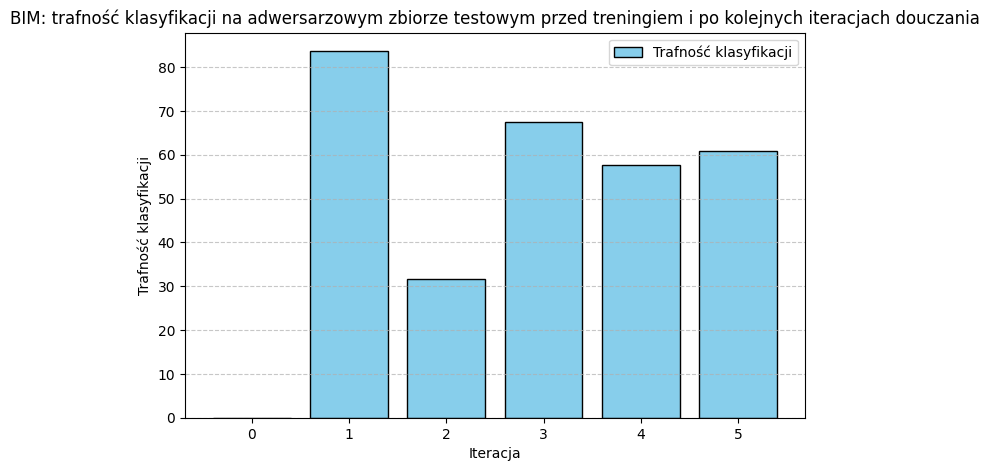

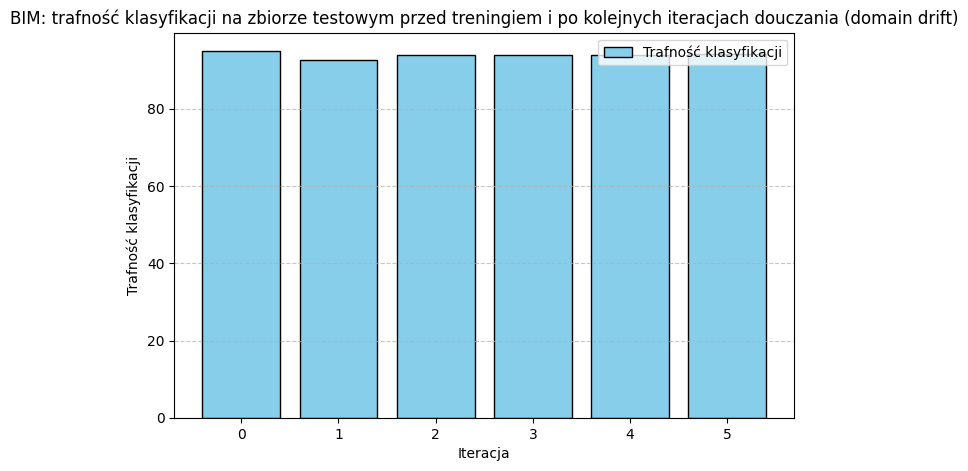

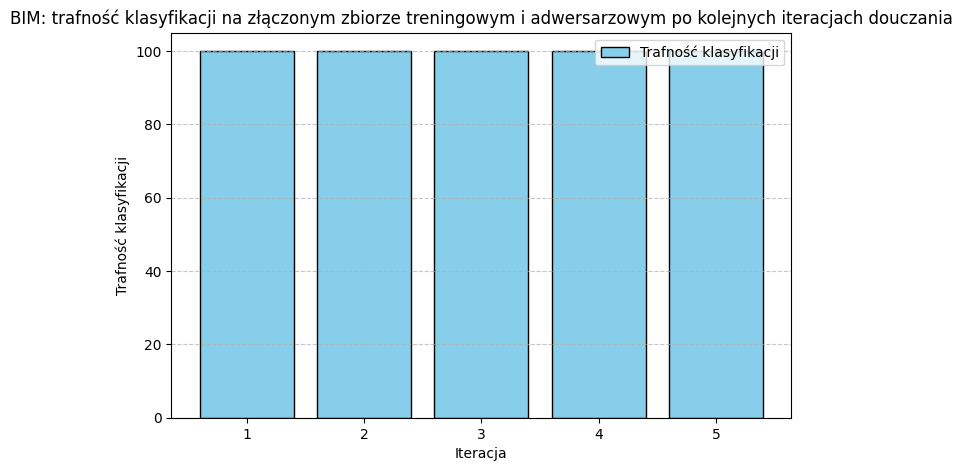

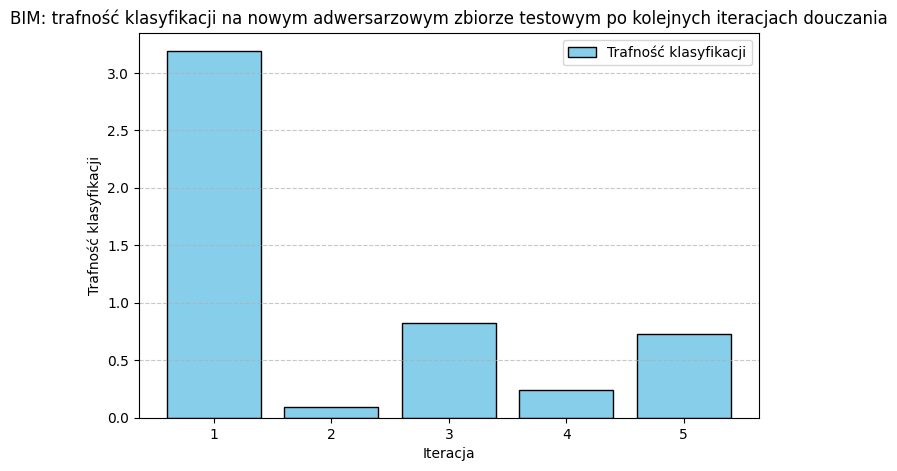

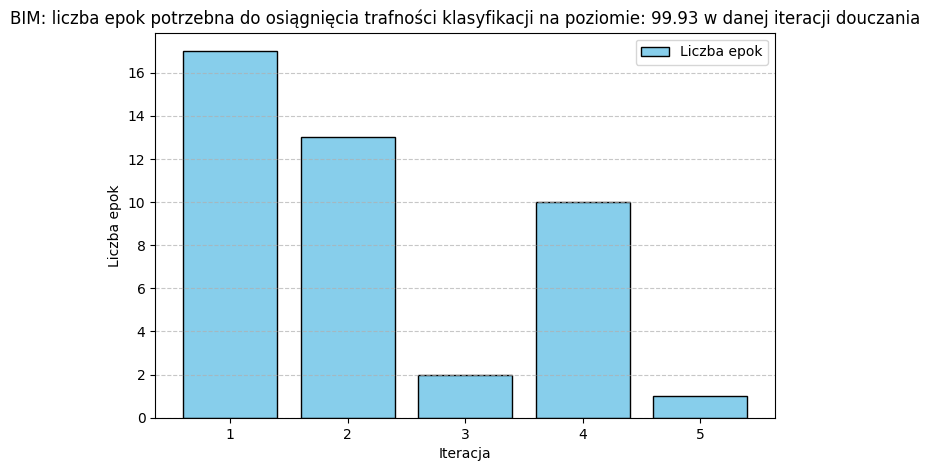

In [17]:
plot_results('bim_results.json', 'BIM')

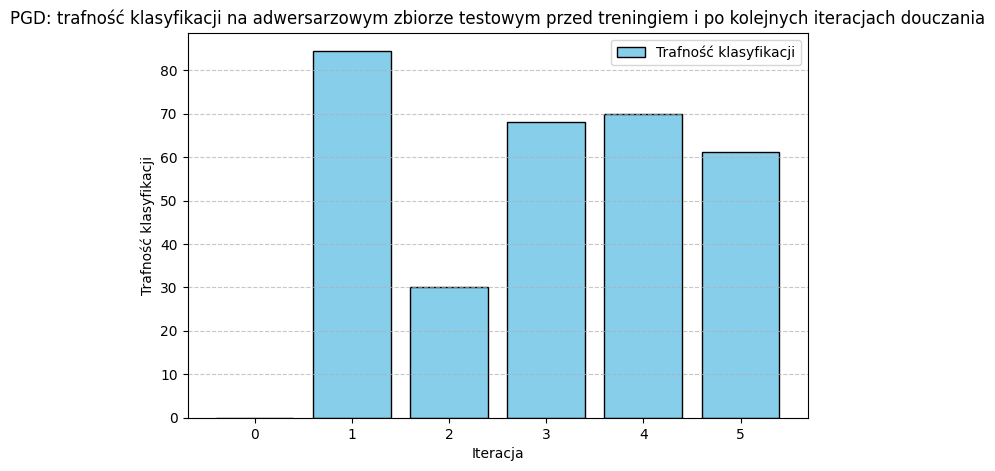

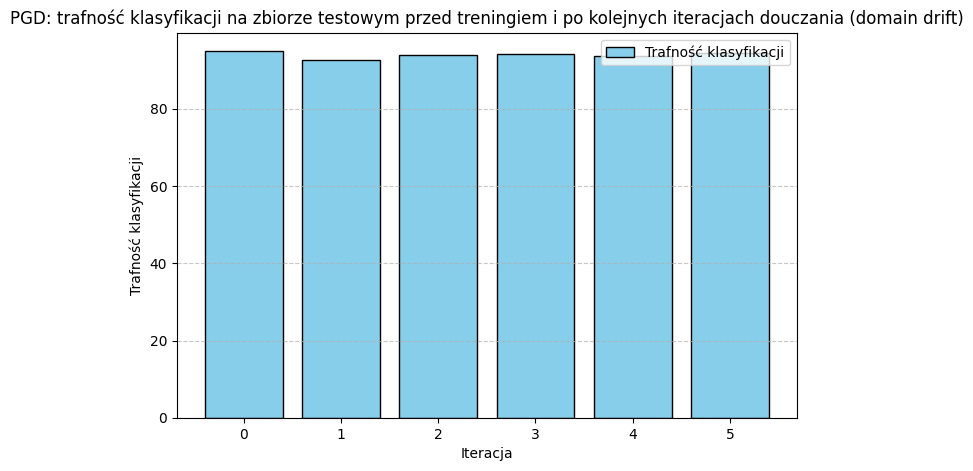

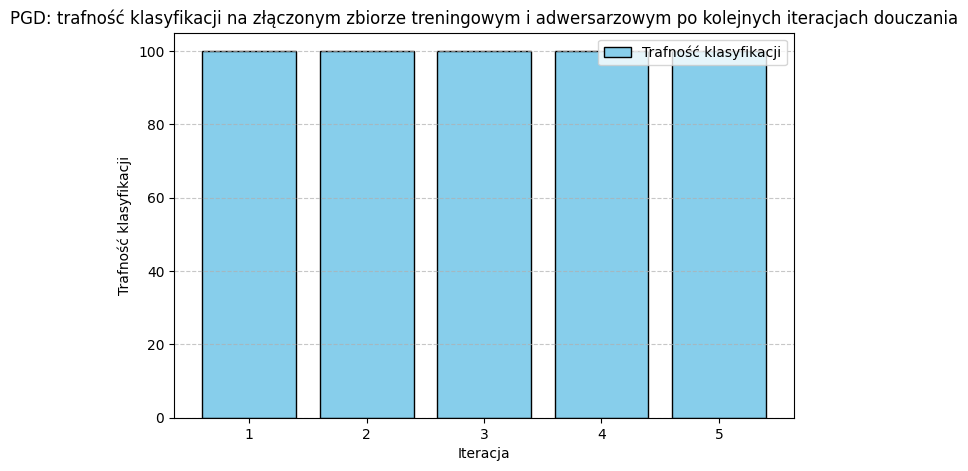

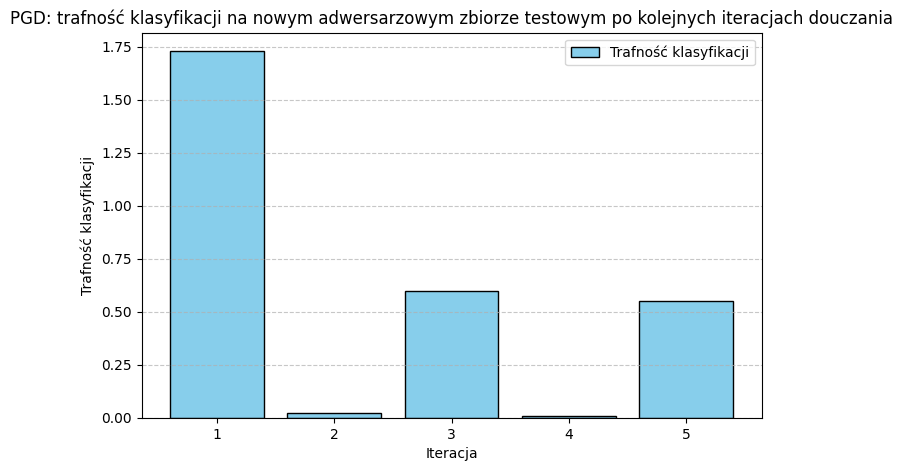

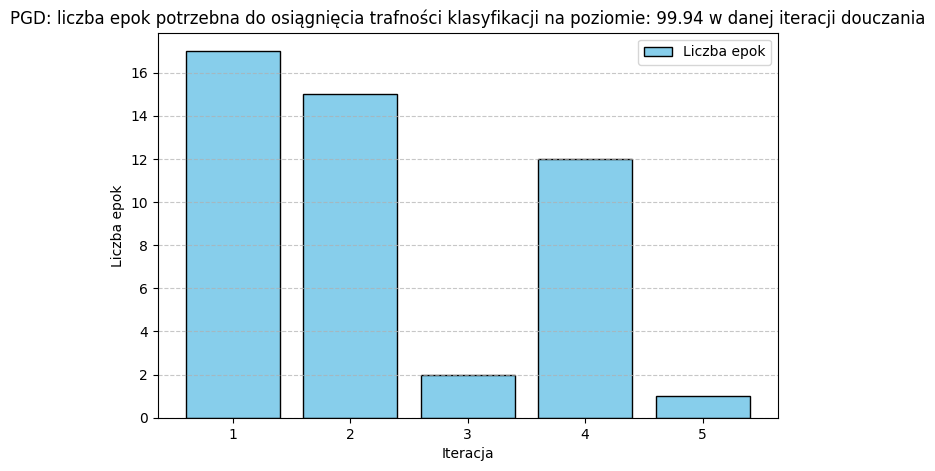

In [18]:
plot_results('pgd_results.json', 'PGD')